# Delivery time prediction

###### by Sidharth Suman

### __Problem statement__

Fulfilling food orders are very time sensitive; the customer expects very fast delivery.  To improve service times, you need to
develop an ETA prediction scheme.  Given the time of day, and the distance to be travelled, we would like to estimate the time it takes to deliver an order (ETA).  Note that this may vary from city to city.




In [15]:
import csv
from matplotlib import pyplot

from datetime import datetime
import geopy.distance
import numpy as np

data_list = []
distance = []
time_taken_minutes = []
with open("data_problem_1.csv", "r") as data_file:
    data_dict = csv.DictReader(data_file)

    for line in data_dict:
        data_list.append(line)
        

    for row in data_list:
        row['R_Lon'] = float(row['R_Lon'])
        row['R_Lat'] = float(row['R_Lat'])
        row['C_Lat'] = float(row['C_Lat'])
        row['C_Lon'] = float(row['C_Lon'])

        row['order_pickedup_time'] = datetime.strptime(row['order_pickedup_time'], "%Y-%m-%d %H:%M:%S")
        row['order_delivered_time'] = datetime.strptime(row['order_delivered_time'], "%Y-%m-%d %H:%M:%S")

        pickup_lat = row['R_Lat']
        pickup_lon = row['R_Lon']
        drop_lat = row['C_Lat']
        drop_lon = row['C_Lon']

        coords_1 = (pickup_lat, pickup_lon)
        coords_2 = (drop_lat, drop_lon)

        row['distance'] = geopy.distance.vincenty(coords_1, coords_2).km
        row['time_taken'] = row['order_delivered_time'] - row['order_pickedup_time']
        
        distance.append(float(row['distance']))
        
        
        secs = row['time_taken'].total_seconds()
        hours = int(secs / 3600)
        minutes = int(secs / 60) % 60
        seconds = int(secs) % 60
        row['time_taken_hr'] = hours
        row['time_taken_minutes'] = minutes 
        time_taken_minutes.append(row['time_taken_minutes'])
        

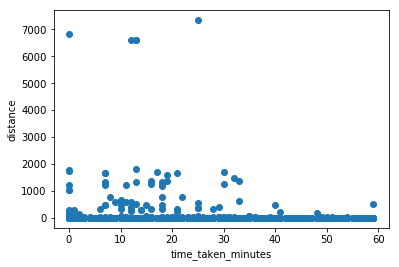

In [18]:
pyplot.scatter(time_taken_minutes,distance)   
pyplot.xlabel('time_taken_minutes')
pyplot.ylabel('distance')
pyplot.show()

### Solution Aproach

In Machine Learning, it is common practice to begin with the most naive approach before putting more time and effort into developing a more complex model or set of features. This data is practically crying out for regression modeling. It’s tempting to brainstorm unusual and clever features or advanced models, but it’s always good to start with bread-and-butter techniques. 
Therefore, I have started with Linear Regression.

As per my understanding, the goal of this project is to make a machine learning program that helps us predict the time taken for a delivery on the basis of pickup and drop location and pick and drop time. So, I have created some new features with the help of features provided to us.

##### Feature Creation 
Some of the additional features that we could use are the distance between the pickup and drop location and the time taken for an order to get delivered. Other than that a a feature to represent the part of the day that is morning evening and night could have been created but I have refrained from doing so in the initial stages.

distance --> distance between the pickup and drop location

time_taken --> time taken to drop a package

time_taken_minutes --> time taken to drop a package(in minutes)

order_pickedup_time_hr--> hour in which the order was picked up

order_pickedup_weekday --> day of the week in which order was picked

I used __time_taken_minutes__ because most of the deliveries were made in an hour and __order_pickedup_time_hr__ was used as an aproach towards measuring time of the day.

I have used geopy package to calculate the distance and Vincenty distance is calculated instead of Haversine distance as Haversine assumes that earth is a perfect sphere. Geopy is a Python 2 and 3 client for several popular geocoding web services.
Geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

##### Validation
In layman's words, validation can be seen as a process of testing our model(or algorithm) to see if it works in the expected order and generates relevant results. In machine learning, it's a process in where a trained model is evaluated with a testing data set. Typically, the provided dataset is divided in two different datasets(the training dataset and testing dataset) in a ratio of 7:3 respectively and the model is trained on the training dataset and then validated on the testing dataset. A classic error in the process of validation would be to train the model or algorithm on the whole dataset and then test(or validate) the algorithm on a part of the same dataset. This will result in overfitting in the model and will lead to innaccurate evaluation metrics and a poor(and unpredicatable) performance on a new(or unseen) dataset.

Here, KFold cross-validation is used with 50 iterations.

##### Evaluation Metric

Finally, we used R-squared value and MAE(mean absolute error) as our evaluation metric because in the Linear Regression model R-squared is the default score measure and is usvally between 0 and 1 and MAE tells us about maximum possible innaccunracy in our model. 

##### Conclusion

Our R-squared score is 0.0109 which is very low and our MAE value is 8.269 that shows that our predicted time can be 8.27 minutes of the correct value.

##### Possible Improvements
So, as the measures show a lot of work needs to be done.
Some of the possible improvements are as follows:

* Measuring time correctly instead of only interms of hour and minutes.
* Better regression model
* Taking the geographical region into account as a new feature.